In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
from fbprophet import Prophet
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
file_name = r'D:\depa work\City data platform\ข้อมูลฉะเชิงเทรา\enivironment\wang-yen subdistrict administrative, chachoengsao, thailand-air-quality.csv'
df = pd.read_csv(file_name, header=0,  parse_dates=['date'])
df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2022-01-03,58,46,13,3,,
1,2022-01-04,77,50,16,4,,
2,2022-01-05,80,54,16,5,1,
3,2022-01-06,98,57,13,4,2,
4,2022-01-07,102,52,13,4,,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2078 non-null   datetime64[ns]
 1   pm25    2078 non-null   object        
 2   pm10    2078 non-null   object        
 3   o3      2078 non-null   object        
 4   no2     2078 non-null   object        
 5   so2     2078 non-null   object        
 6   co      2078 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 113.8+ KB


In [4]:
# df2 = df.resample('D').mean()  #hourly average data to date
# df2

In [5]:
# df2.plot(y='pm2.5', kind = 'line')

In [6]:
df['pm25'] = pd.to_numeric(df['pm25'],errors = 'coerce')
df['pm10'] = pd.to_numeric(df['pm10'],errors = 'coerce')
df['o3'] = pd.to_numeric(df['o3'],errors = 'coerce')
df['no2'] = pd.to_numeric(df['no2'],errors = 'coerce')
df['so2'] = pd.to_numeric(df['so2'],errors = 'coerce')
df['co'] = pd.to_numeric(df['co'],errors = 'coerce')
df.dropna(subset=['pm25'], inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1240
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1241 non-null   datetime64[ns]
 1   pm25    1241 non-null   float64       
 2   pm10    1233 non-null   float64       
 3   o3      1224 non-null   float64       
 4   no2     1026 non-null   float64       
 5   so2     593 non-null    float64       
 6   co      2 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 77.6 KB


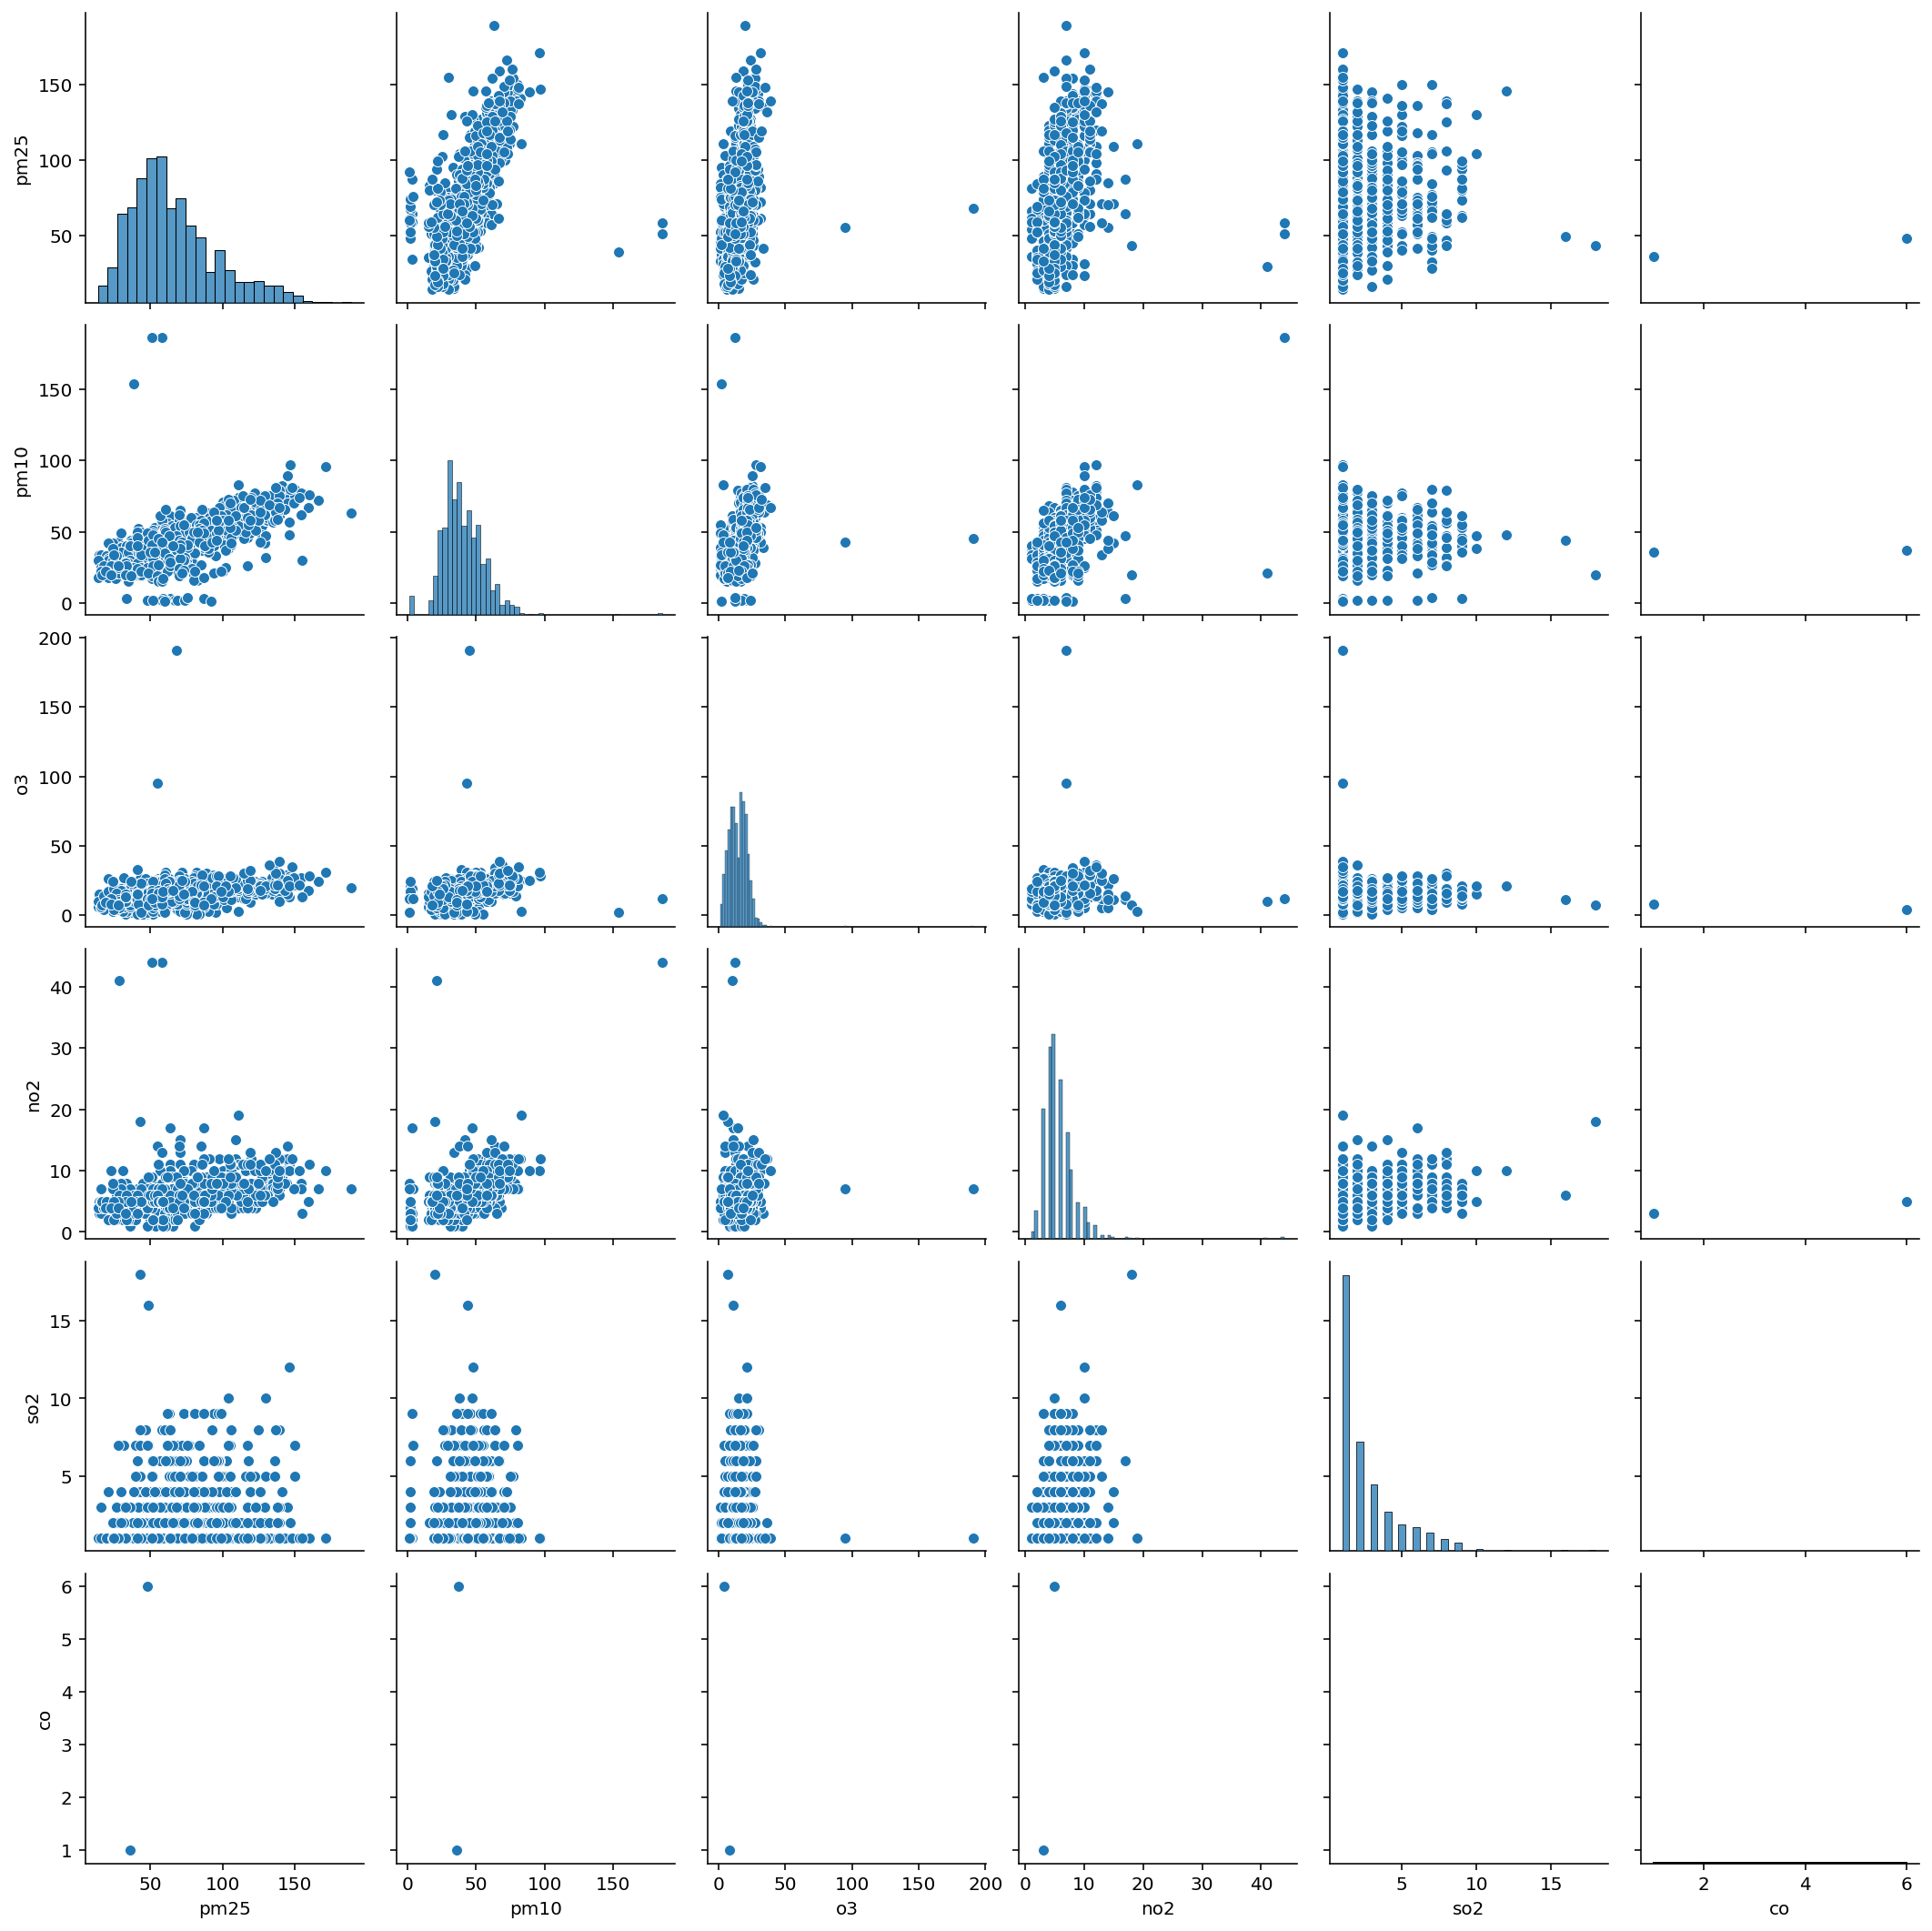

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='date'>

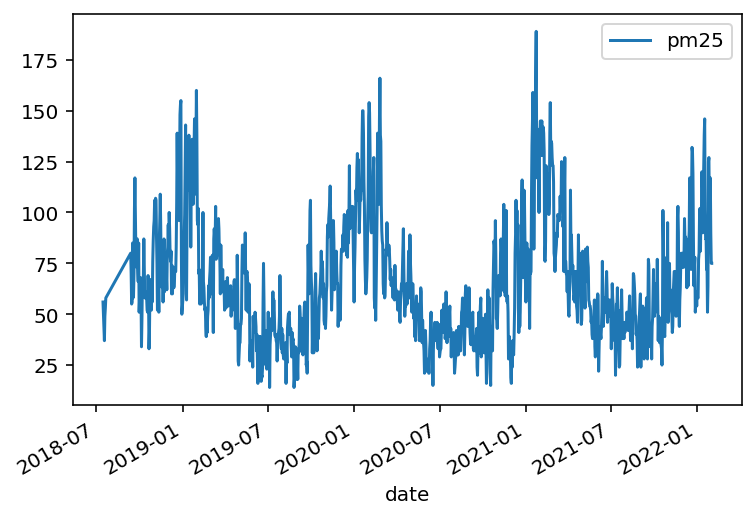

In [9]:
df.plot(kind = 'line', x = 'date', y = 'pm25')


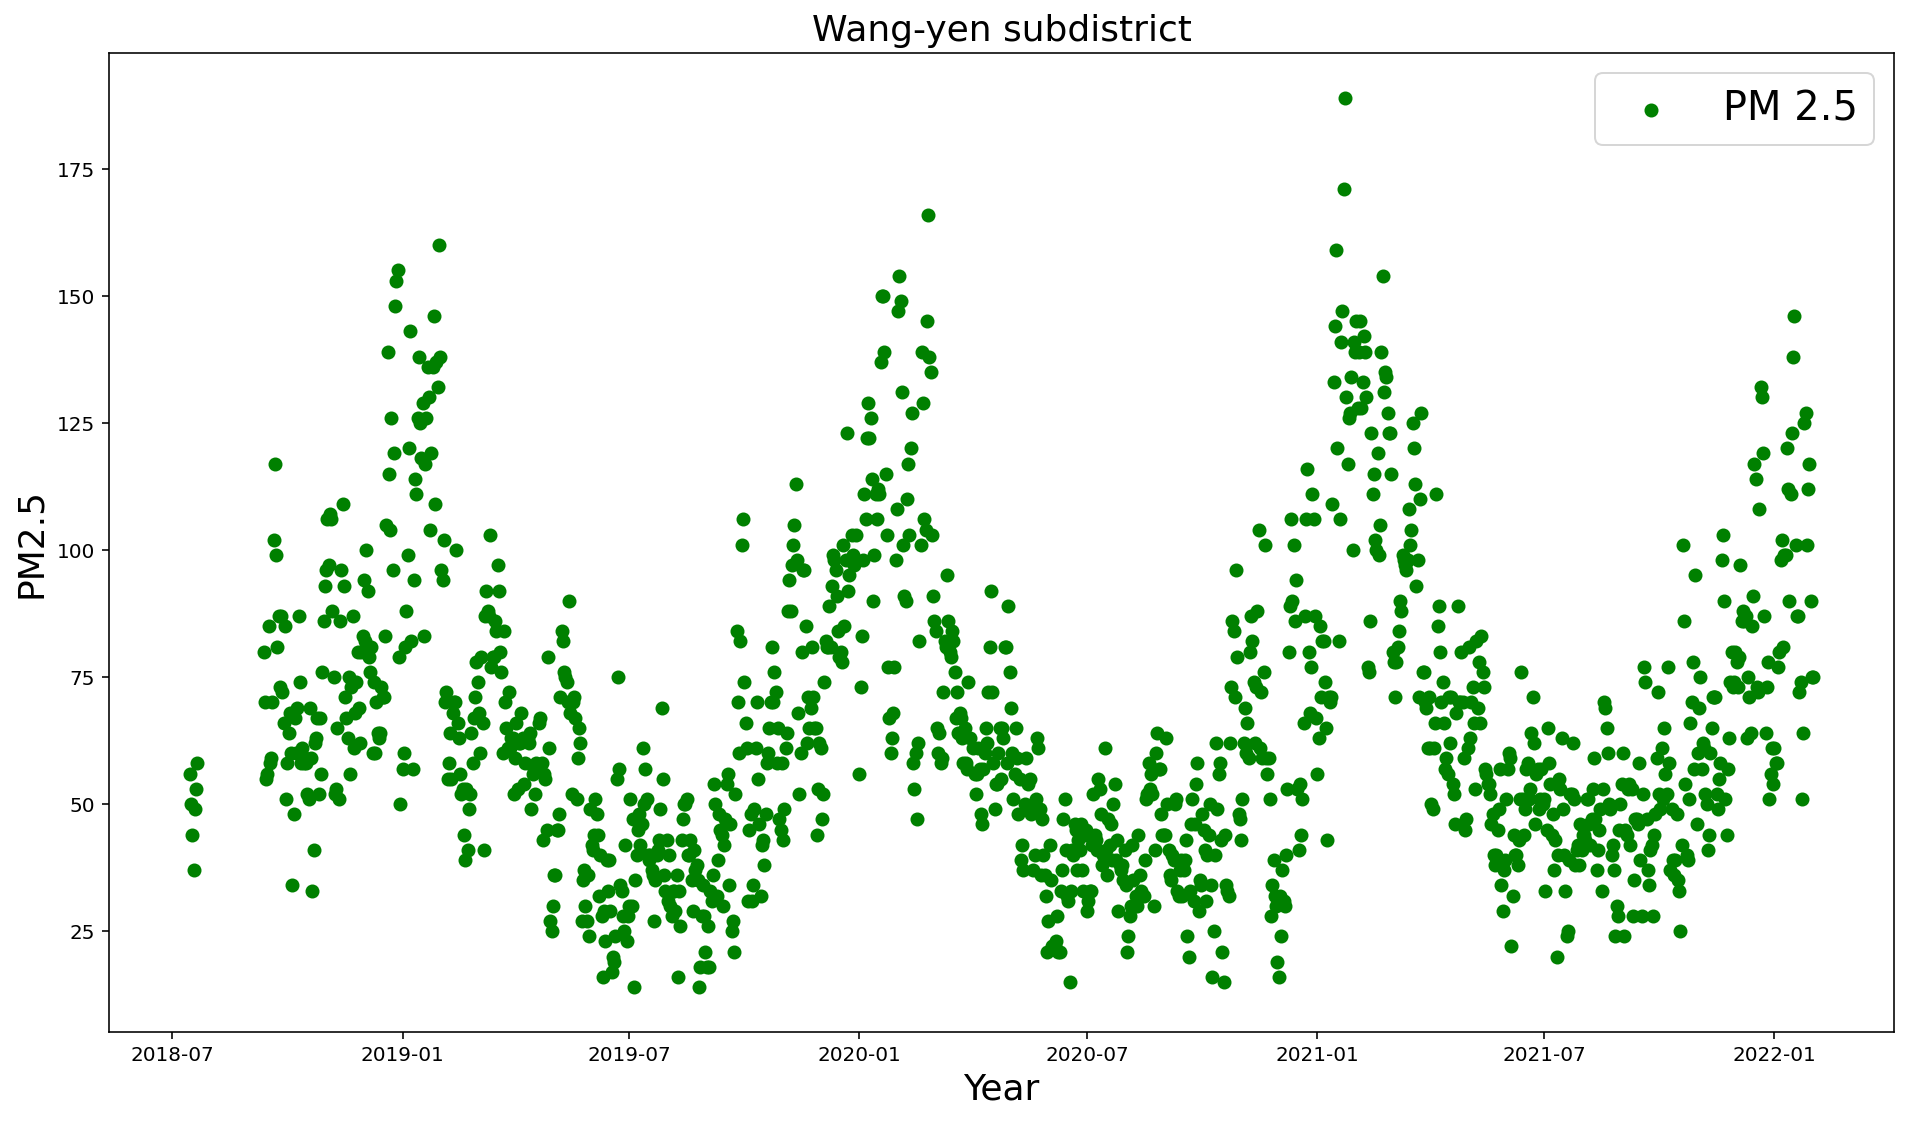

In [10]:
plt.figure(figsize=(16,9))
plt.scatter(df['date'], df['pm25'], color='g', label='PM 2.5')
plt.xlabel('Year',fontsize=18)
plt.ylabel('PM2.5',fontsize=18)
plt.title(f'Wang-yen subdistrict',fontsize=18)
plt.legend( prop={'size':20})
plt.savefig('Wang-yen subdistrict AQI1.jpg', dpi=800)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1240
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1241 non-null   datetime64[ns]
 1   pm25    1241 non-null   float64       
 2   pm10    1233 non-null   float64       
 3   o3      1224 non-null   float64       
 4   no2     1026 non-null   float64       
 5   so2     593 non-null    float64       
 6   co      2 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 77.6 KB


In [12]:
data = df[['date', 'pm25']]
data.columns=['ds', 'y']
data

,ds,y
0,2022-01-03,58.0
1,2022-01-04,77.0
2,2022-01-05,80.0
3,2022-01-06,98.0
4,2022-01-07,102.0
...,...,...
1236,2018-09-26,87.0
1237,2018-09-27,72.0
1238,2018-09-28,66.0
1239,2018-09-29,85.0


In [28]:
data.to_csv("data_wangyen.csv",index =False)

In [13]:
model=Prophet()
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future=model.make_future_dataframe(periods=365, freq='D')

In [15]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-07-15,76.489012,31.156886,79.111003,76.489012,76.489012,-22.089993,-22.089993,-22.089993,-0.804598,-0.804598,-0.804598,-21.285395,-21.285395,-21.285395,0.0,0.0,0.0,54.399019
1,2018-07-16,76.431347,30.326951,80.149843,76.431347,76.431347,-21.960003,-21.960003,-21.960003,-0.534910,-0.534910,-0.534910,-21.425093,-21.425093,-21.425093,0.0,0.0,0.0,54.471344
2,2018-07-17,76.373681,31.431734,78.993290,76.373681,76.373681,-21.620384,-21.620384,-21.620384,-0.038127,-0.038127,-0.038127,-21.582257,-21.582257,-21.582257,0.0,0.0,0.0,54.753297
3,2018-07-18,76.316016,32.778953,80.642715,76.316016,76.316016,-20.195550,-20.195550,-20.195550,1.562121,1.562121,1.562121,-21.757671,-21.757671,-21.757671,0.0,0.0,0.0,56.120466
4,2018-07-19,76.258351,30.896833,78.788013,76.258351,76.258351,-20.576887,-20.576887,-20.576887,1.374579,1.374579,1.374579,-21.951466,-21.951466,-21.951466,0.0,0.0,0.0,55.681464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,2023-01-28,50.815171,79.077050,126.678663,46.346867,56.178588,52.388232,52.388232,52.388232,-0.264674,-0.264674,-0.264674,52.652906,52.652906,52.652906,0.0,0.0,0.0,103.203403
1602,2023-01-29,50.787007,76.018111,126.080319,46.291023,56.172112,50.722164,50.722164,50.722164,-0.804598,-0.804598,-0.804598,51.526762,51.526762,51.526762,0.0,0.0,0.0,101.509171
1603,2023-01-30,50.758842,76.132225,125.745424,46.228552,56.165635,49.647178,49.647178,49.647178,-0.534910,-0.534910,-0.534910,50.182088,50.182088,50.182088,0.0,0.0,0.0,100.406021
1604,2023-01-31,50.730678,76.286543,121.662673,46.164642,56.159158,48.607757,48.607757,48.607757,-0.038127,-0.038127,-0.038127,48.645884,48.645884,48.645884,0.0,0.0,0.0,99.338434


In [26]:
forecast.to_csv("Wang-yen_aqi.csv",index=False)

In [16]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2018-07-15,54.399019,31.156886,79.111003
1,2018-07-16,54.471344,30.326951,80.149843
2,2018-07-17,54.753297,31.431734,78.993290
3,2018-07-18,56.120466,32.778953,80.642715
4,2018-07-19,55.681464,30.896833,78.788013
...,...,...,...,...
1601,2023-01-28,103.203403,79.077050,126.678663
1602,2023-01-29,101.509171,76.018111,126.080319
1603,2023-01-30,100.406021,76.132225,125.745424
1604,2023-01-31,99.338434,76.286543,121.662673


In [27]:
forecast.to_csv("data_forecast.csv",index =False)

In [17]:
dt=pd.merge(data, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2022-01-03,58.0,85.939400,61.999553,110.599697
1,2022-01-04,77.0,87.270835,65.538428,112.252945
2,2022-01-05,80.0,89.902285,65.693743,114.704750
3,2022-01-06,98.0,90.938052,66.088589,115.184936
4,2022-01-07,102.0,89.674392,65.473722,112.551227
...,...,...,...,...,...
1236,2018-09-26,87.0,65.245895,41.048885,87.240956
1237,2018-09-27,72.0,65.304894,41.379371,89.146482
1238,2018-09-28,66.0,62.730843,40.263411,85.257059
1239,2018-09-29,85.0,63.700847,41.369889,89.282140


In [18]:
dt.shape

(1241, 5)

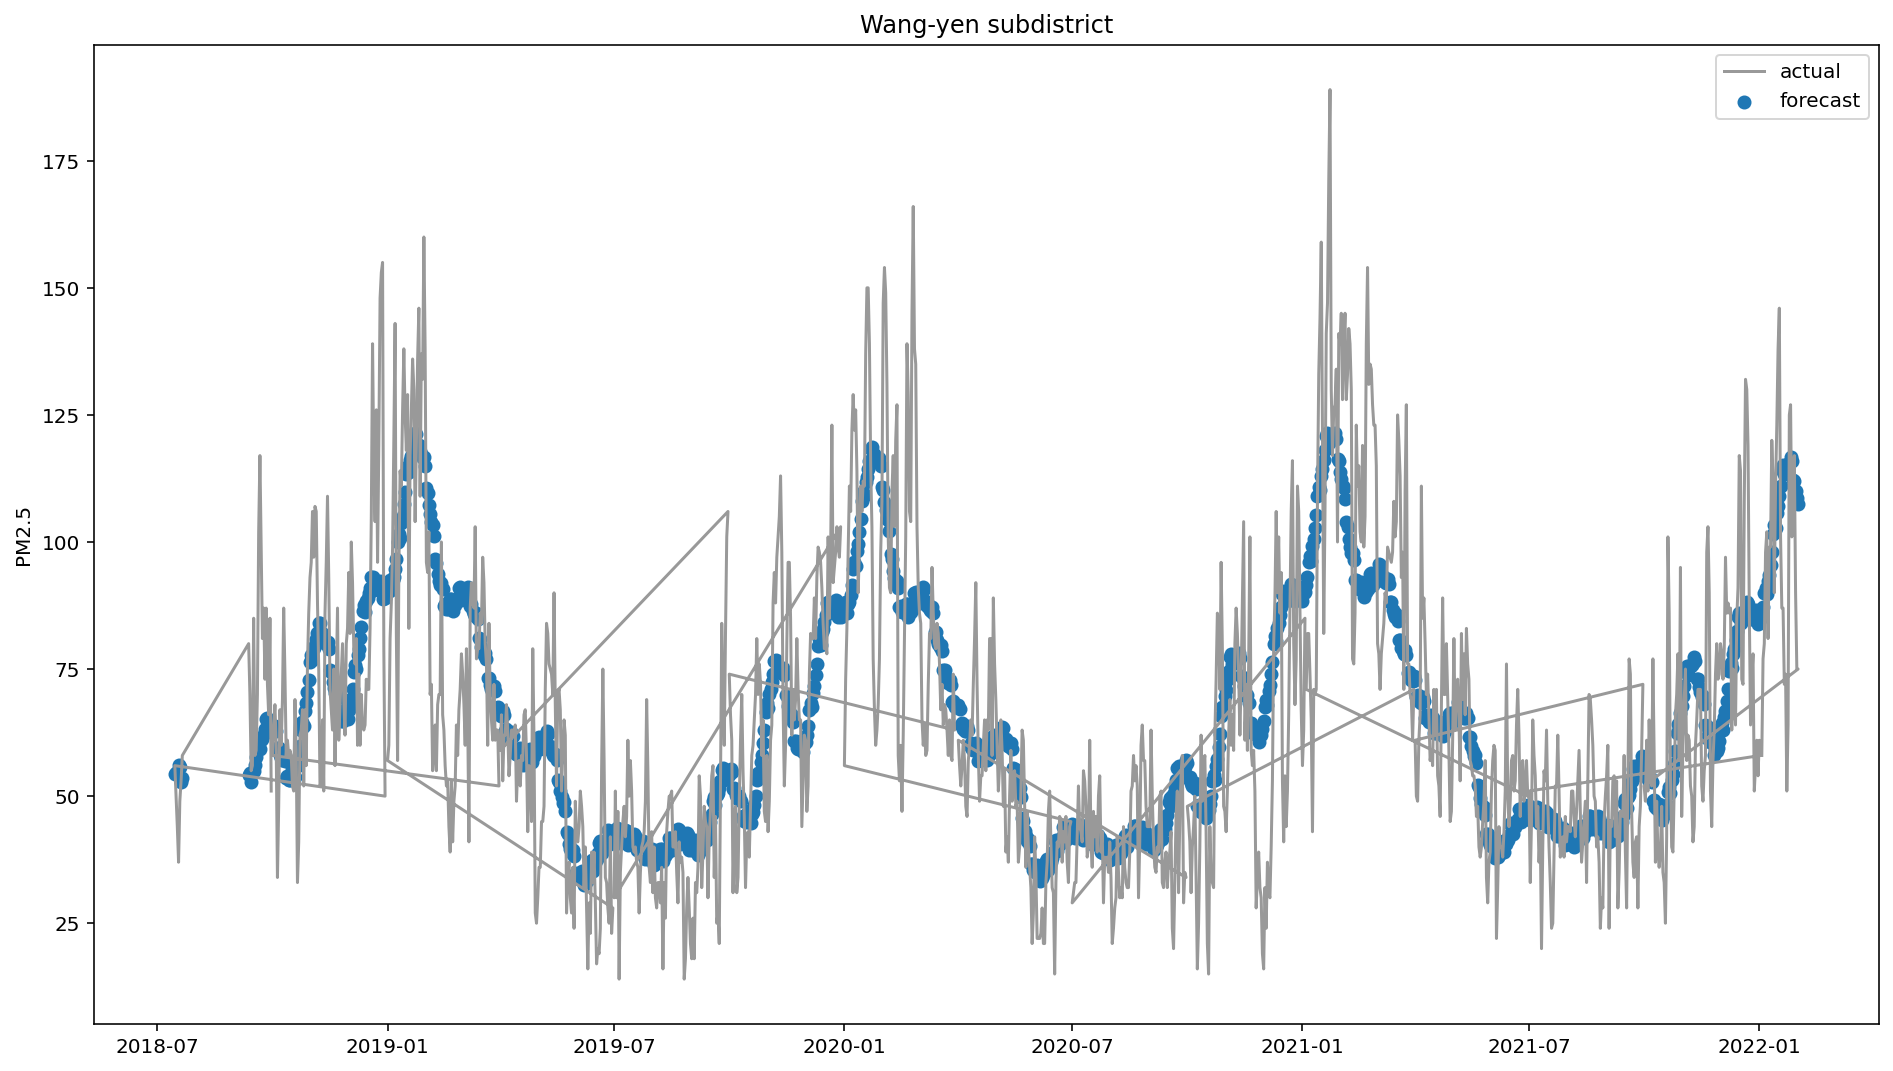

In [19]:
plt.figure(figsize=(16,9))
plt.plot(dt['ds'], dt['y'], color='.6', label='actual')
plt.scatter(dt['ds'], dt['yhat'], label='forecast')
plt.ylabel('PM2.5')
plt.title(f'Wang-yen subdistrict')
plt.legend()
# plt.savefig('AQI2.jpg', dpi=800)

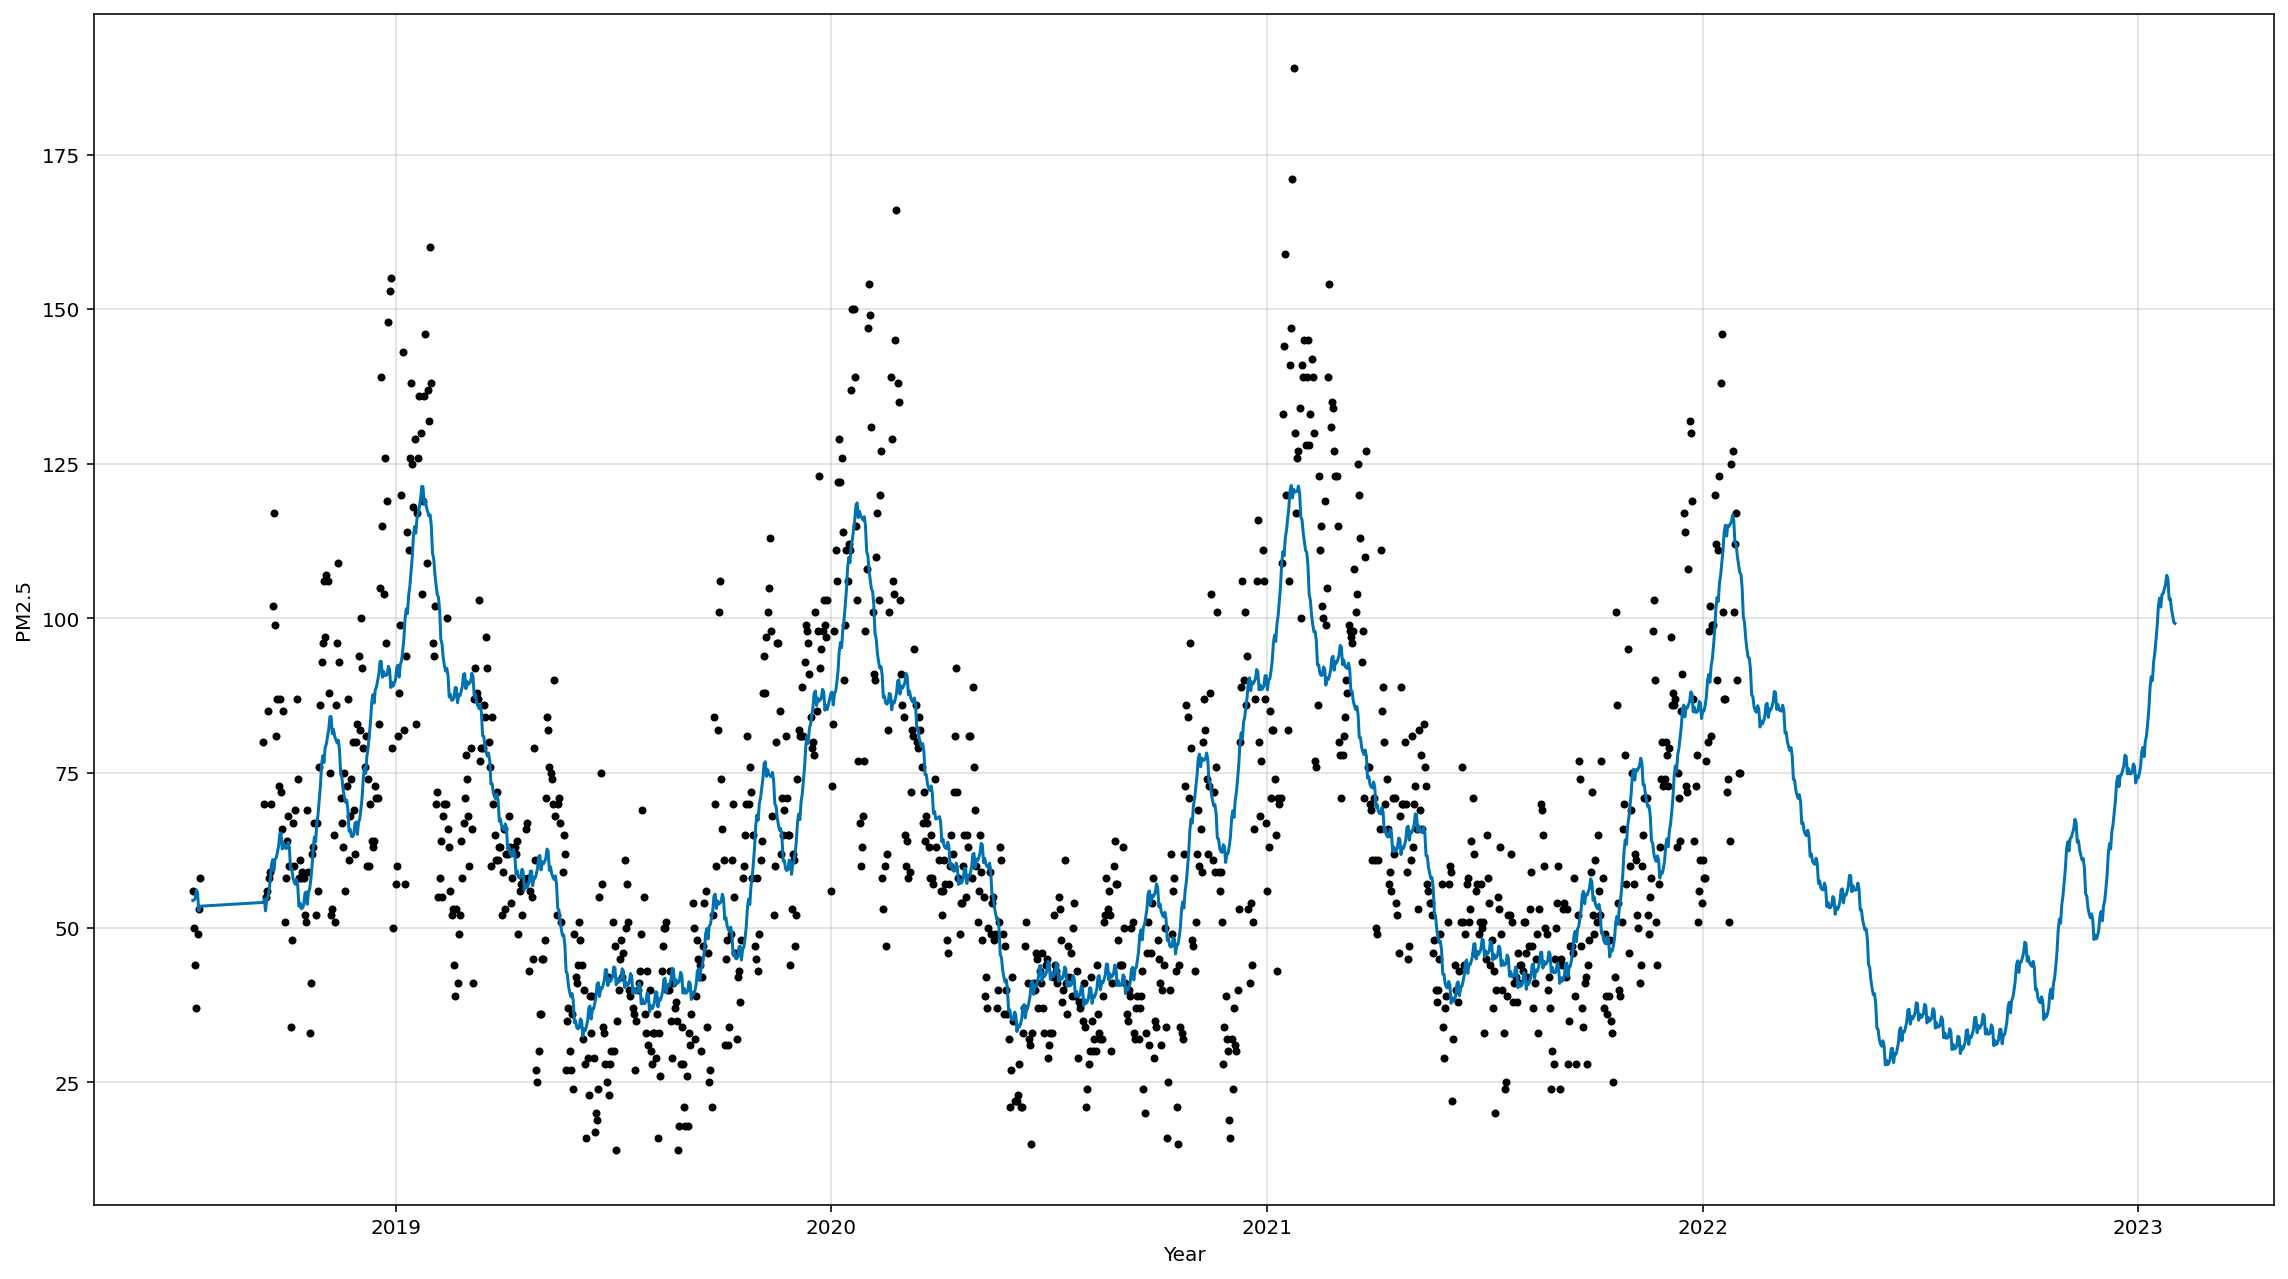

In [20]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='Year', ylabel='PM2.5')


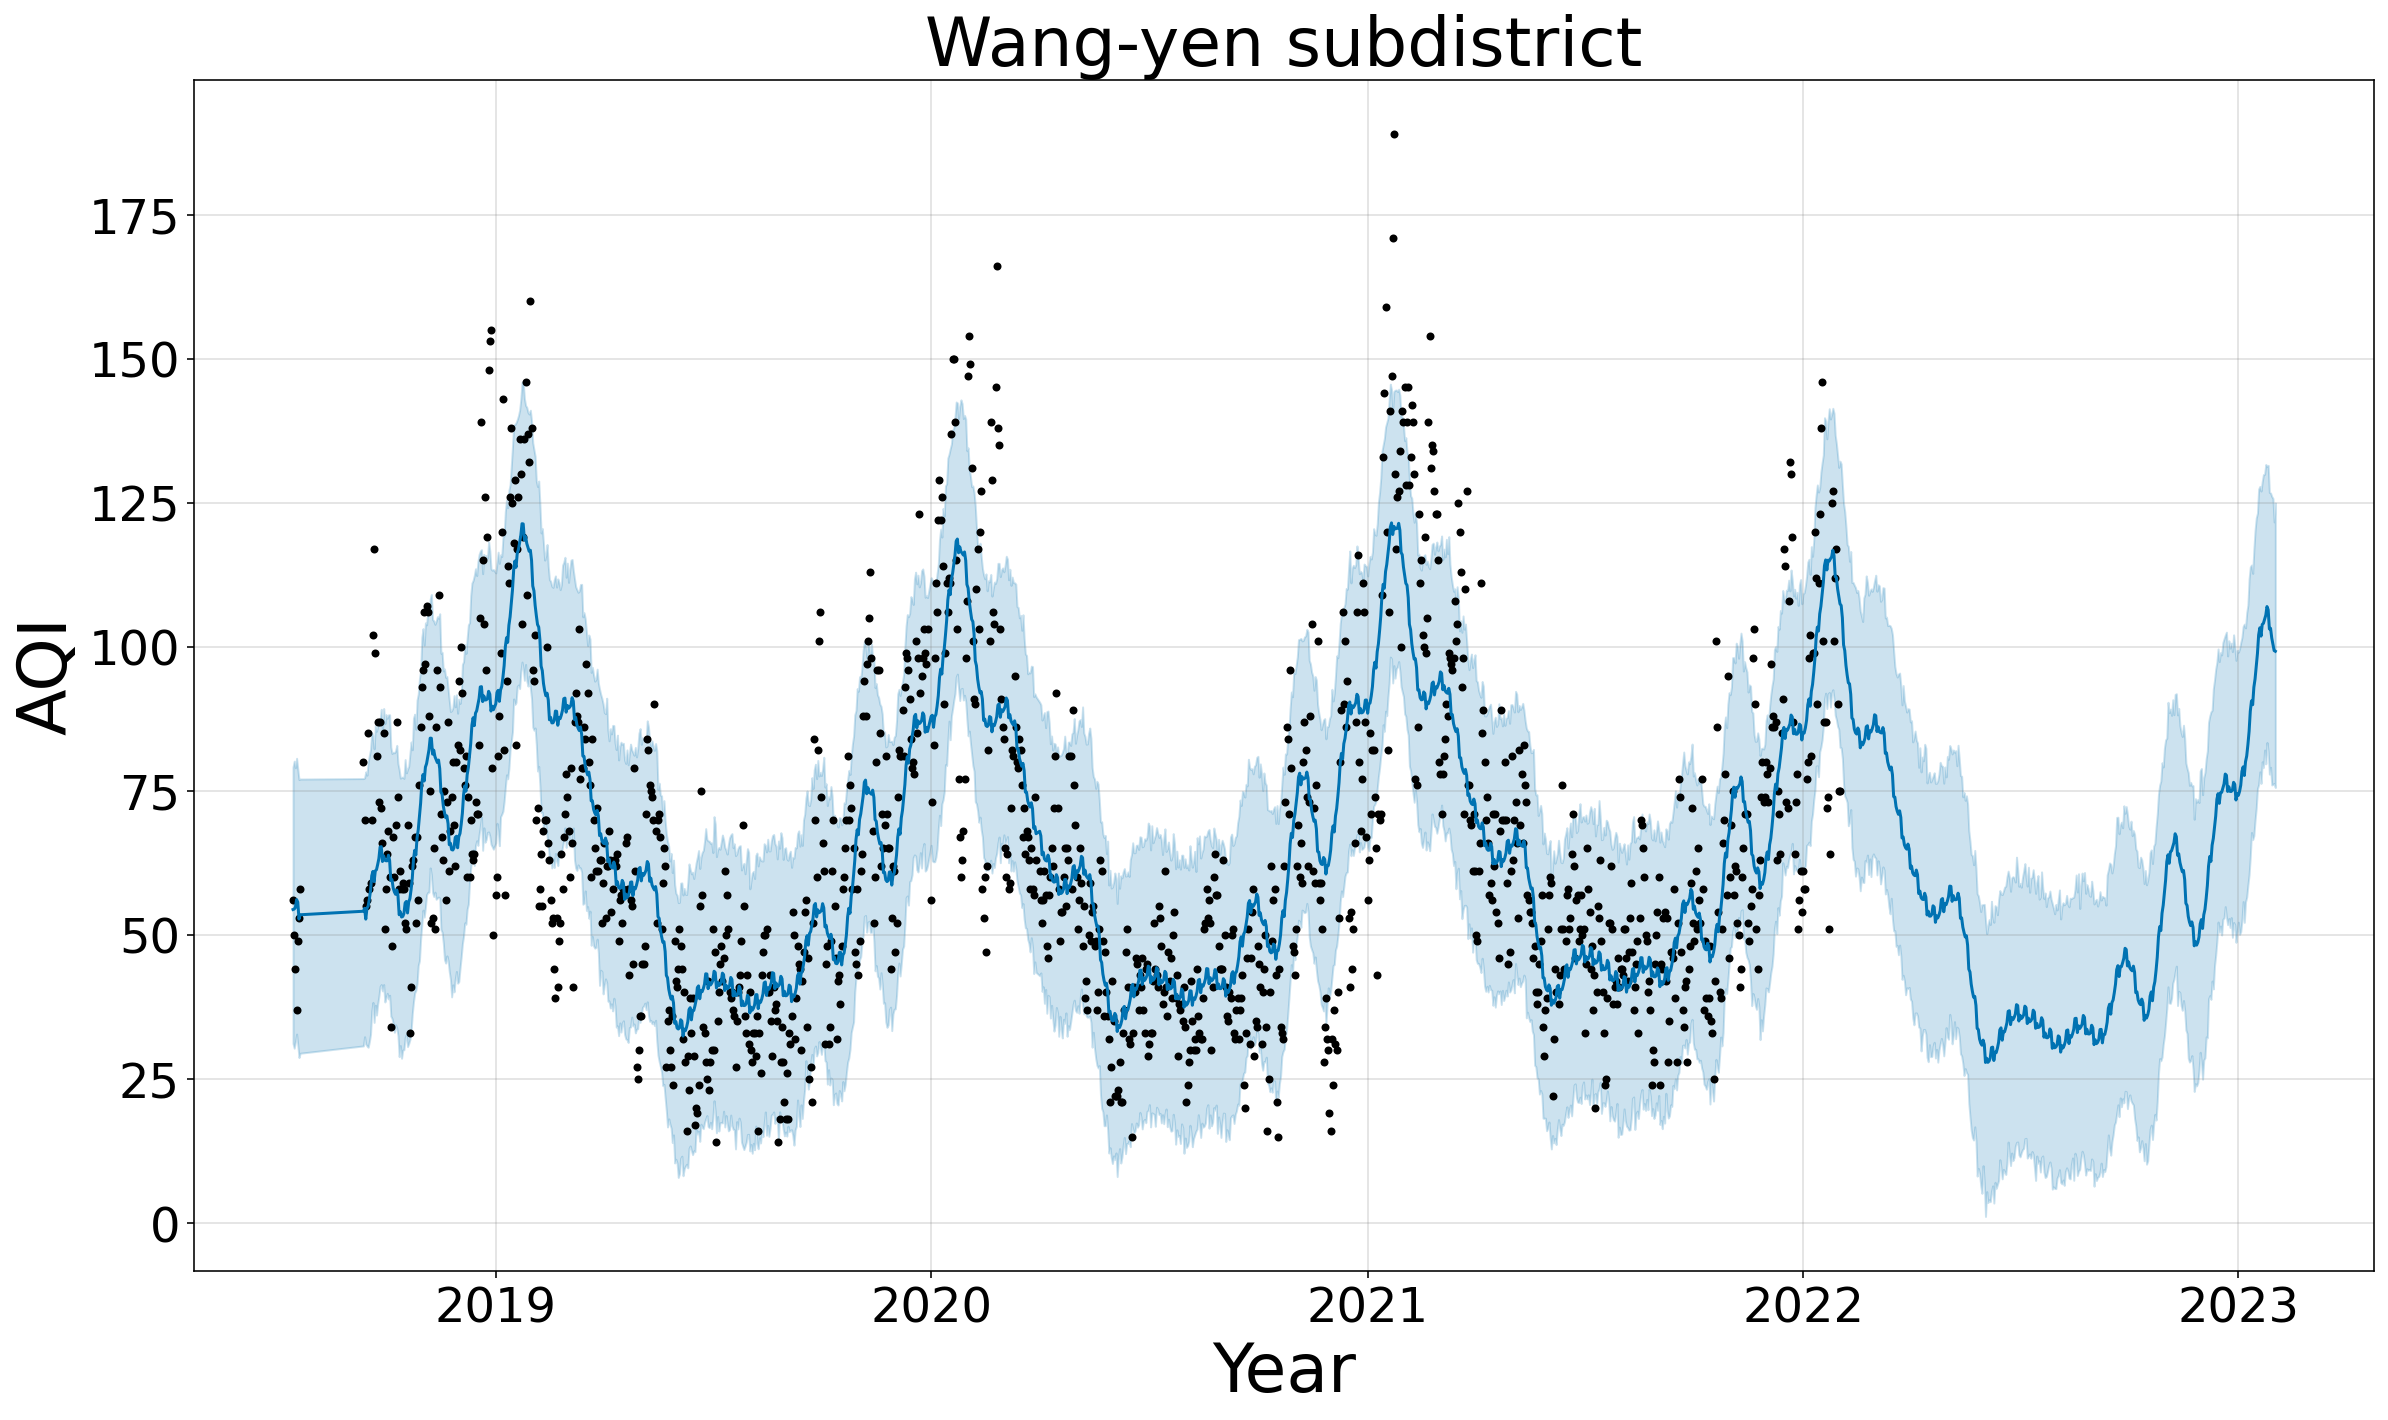

In [21]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9))
ax = fig.gca()
ax.set_title("Wang-yen subdistrict", size=34)
ax.set_xlabel("Year", size=34)
ax.set_ylabel("AQI", size=34)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

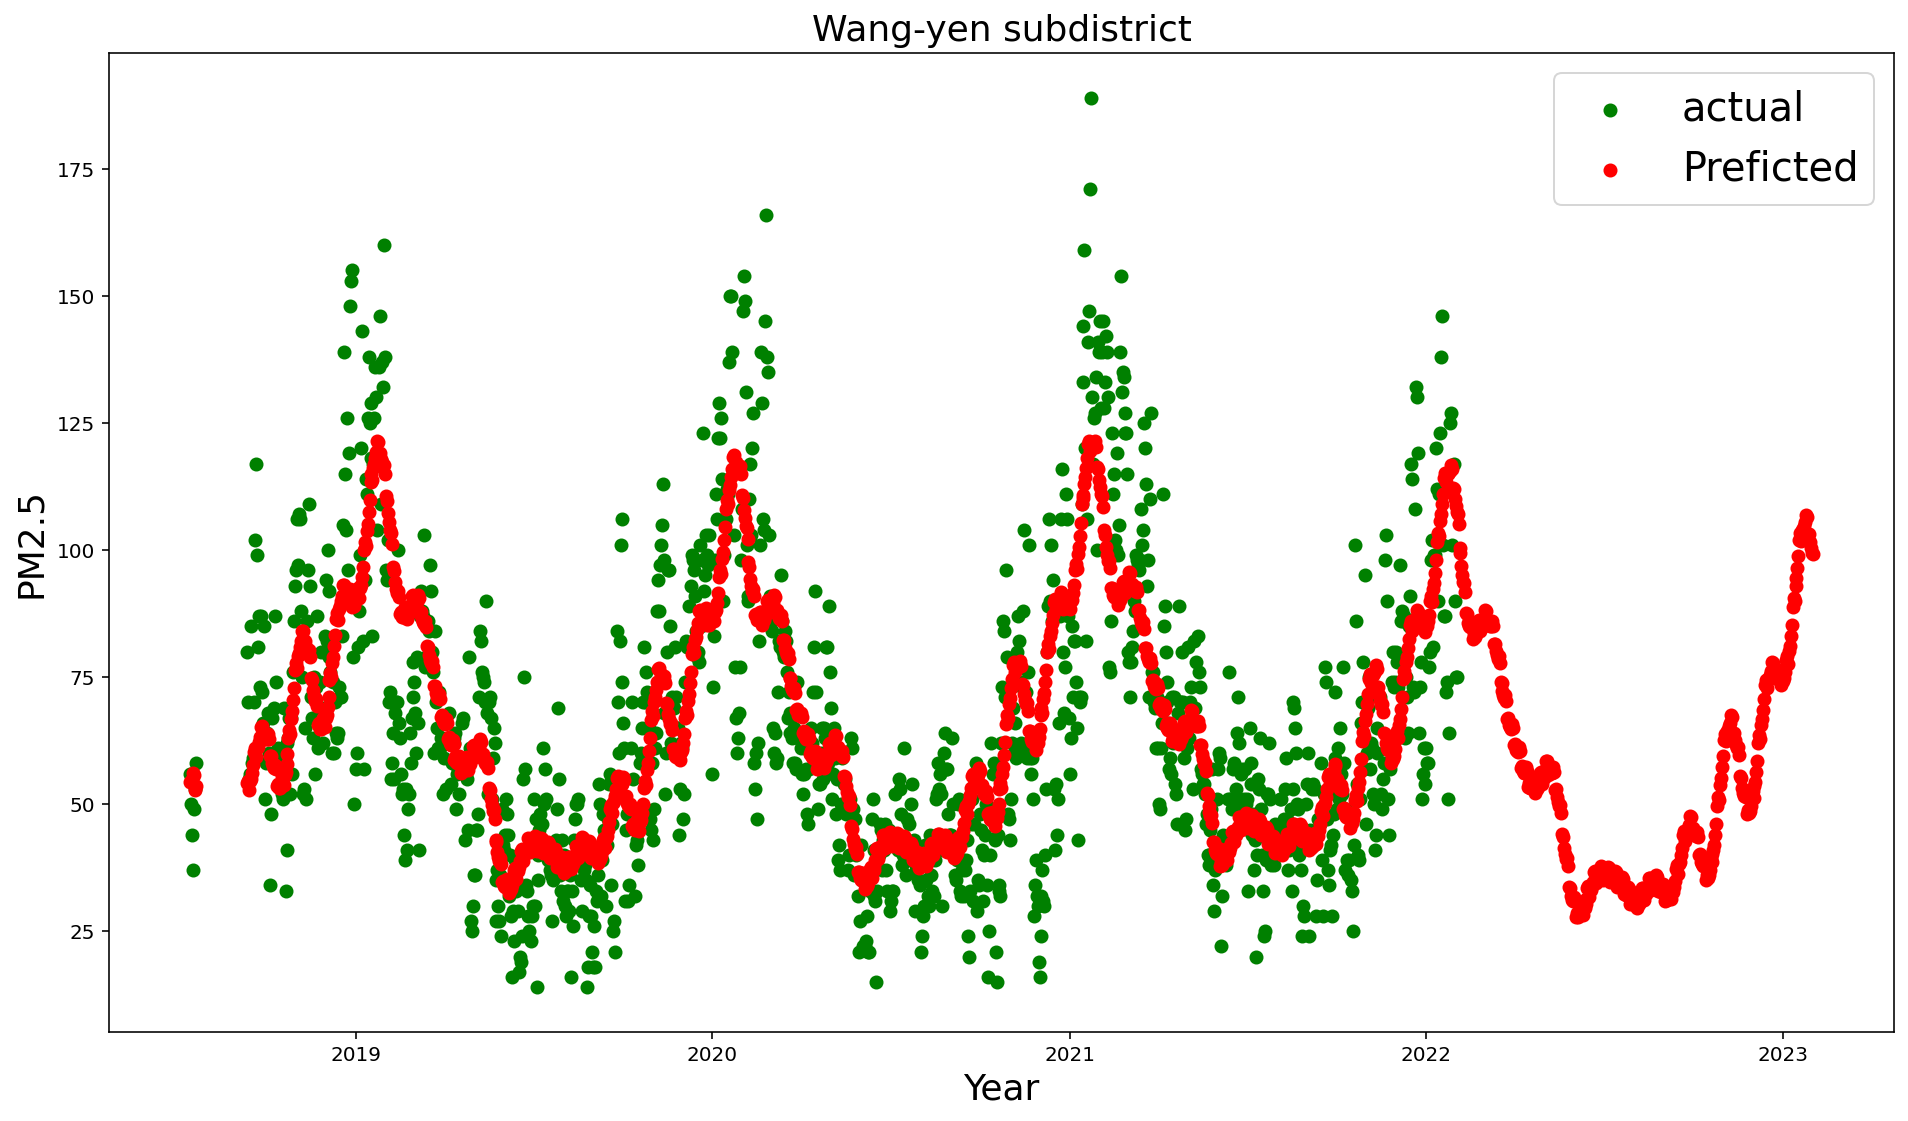

In [22]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='g', label='actual')
plt.scatter(dfcst['ds'], dfcst['yhat'],  color='r',label='Preficted')
plt.ylabel('PM2.5',  fontsize=18)
plt.xlabel('Year',  fontsize=18)
plt.title(f'Wang-yen subdistrict',  fontsize=18)
plt.legend(prop={'size':20})
plt.savefig('Wang-yen subdistrict AQI2.jpg', dpi=800)



In [ ]:
dt=pd.merge(data, dfcst, left_on='ds', right_on='ds')

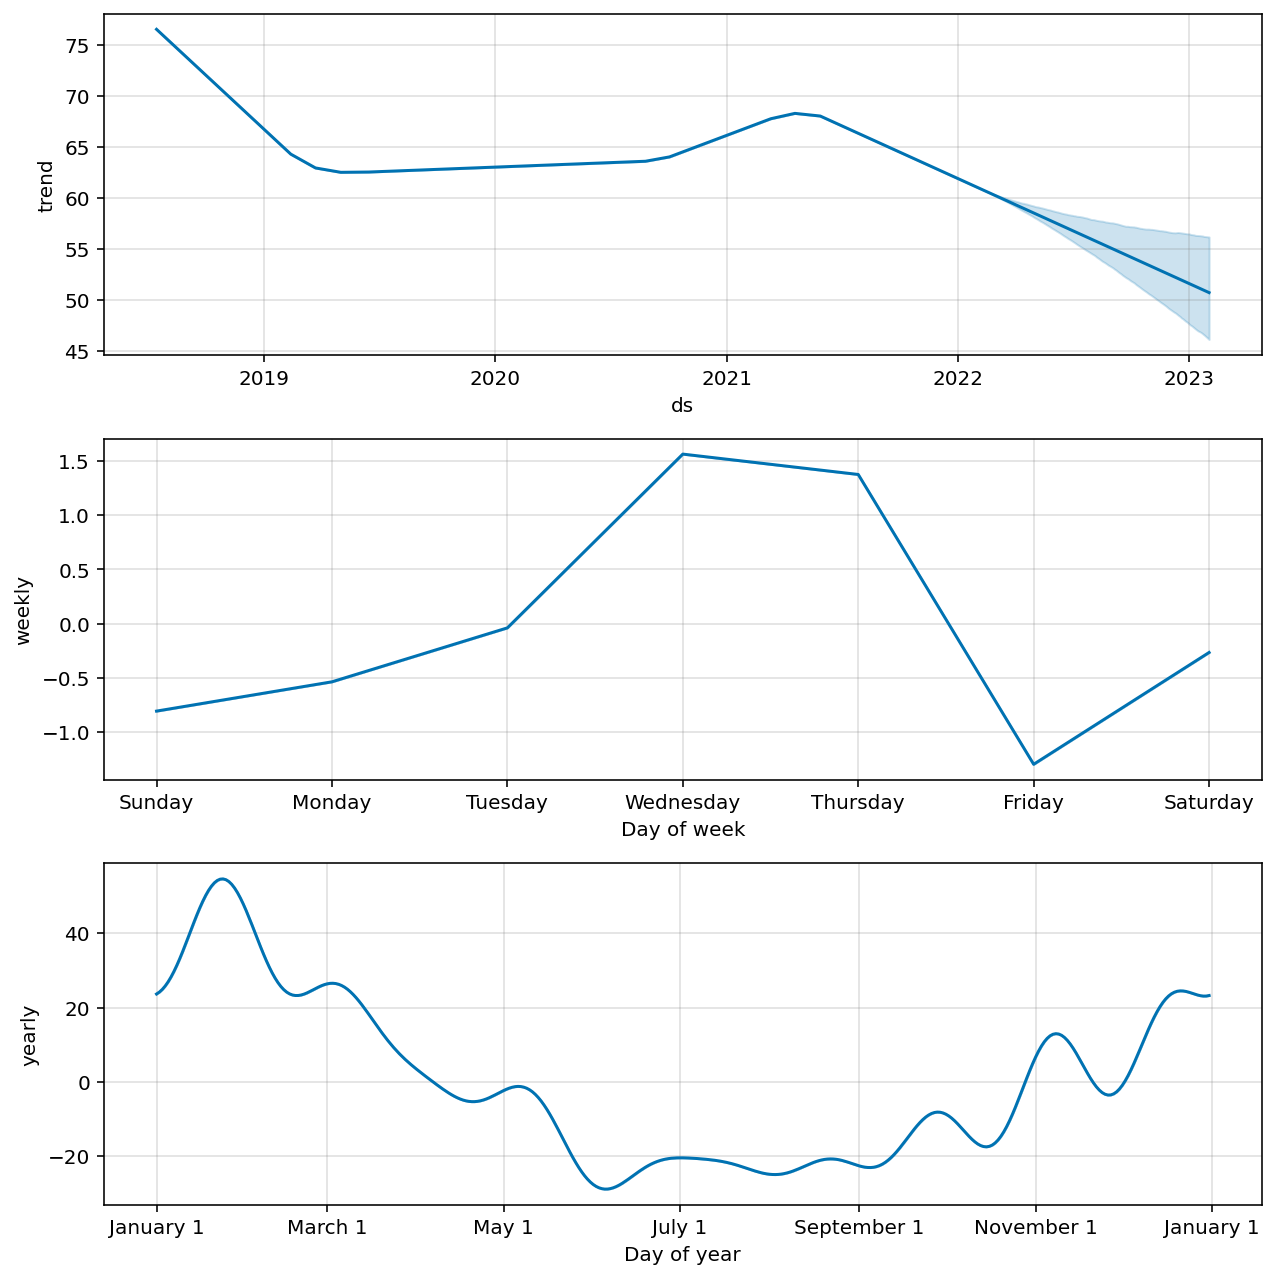

In [24]:
fig=model.plot_components(forecast)
fig.savefig('Wang-yen subdistrict AQI3.jpg', dpi=800) 